TypeError: Input z must be a 2D array.

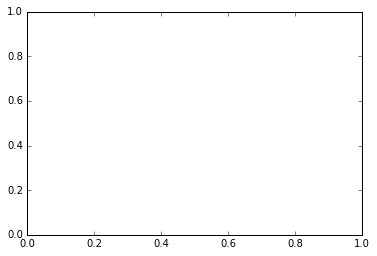

In [8]:
import re
fname = "../Simulation/160128-10-2_cylindrical_inner.table"
f = open(fname,'r')
next(f)
X = []
Y = []
Z = []
for line in f:
    eline = line.split()
    noline = [float(x) for x in eline]
    #print eline
    if(noline[1] != 6.0): continue
    X.append(noline[0])
    Y.append(noline[2])
    Z.append(noline[5])
    #print noline
    #print noline[6]+noline[7]

    
#print X
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X1, Y1 = np.meshgrid(xlist, ylist)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

[[ 4.24264069  4.20000437  4.15781429 ...,  4.15781429  4.20000437
   4.24264069]
 [ 4.20000437  4.15693077  4.11429901 ...,  4.11429901  4.15693077
   4.20000437]
 [ 4.15781429  4.11429901  4.07122086 ...,  4.07122086  4.11429901
   4.15781429]
 ..., 
 [ 4.15781429  4.11429901  4.07122086 ...,  4.07122086  4.11429901
   4.15781429]
 [ 4.20000437  4.15693077  4.11429901 ...,  4.11429901  4.15693077
   4.20000437]
 [ 4.24264069  4.20000437  4.15781429 ...,  4.15781429  4.20000437
   4.24264069]]


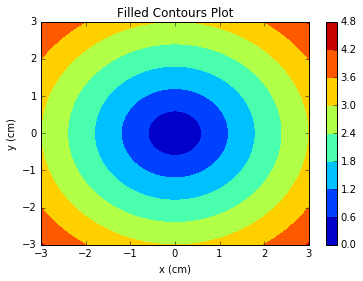

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
plt.figure()
print Z
cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

[[480 474 472 ..., 695 712 734]
 [480 476 475 ..., 675 703 732]
 [472 472 475 ..., 658 692 719]
 ..., 
 [420 415 412 ..., 423 435 439]
 [439 430 412 ..., 442 458 452]
 [456 454 438 ..., 459 471 467]]


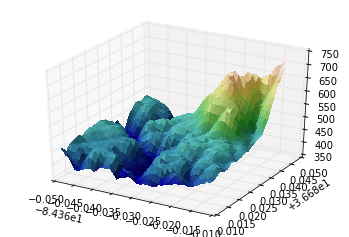

In [5]:
"""
Demonstrates using custom hillshading in a 3D surface plot. """
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False) 
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols) 
    y = np.linspace(dem['ymin'], dem['ymax'], nrows) 
    x, y = np.meshgrid(x, y)

    region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass 
# in the rgb colors of the shaded surface calculated from "shade".
#print z
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft') 
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, \
                       linewidth=0, antialiased=False, shade=False)
plt.show()